# Random Forest Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Prepare Dataset

In [2]:
datasetPath = "../Dataset/balanced-74Attributes-top17_ProtocolName.csv"

df = pd.read_csv(datasetPath)
#df = pd.read_csv(datasetPath, nrows=10000)
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,3232238138,55681,180881158,3128,6,19002242,3,17,6,30.0,...,7352281.0,0.000000,7352281.0,7352281.0,11649832.0,0.000000e+00,11649832.0,11649832.0,131,HTTP_PROXY
1,180881160,3128,3232246304,53107,6,119684671,1006,898,1398550,5388.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY
2,3232243804,59584,180881158,3128,6,118953292,24,66,1325,5077.0,...,336393.6,238675.043634,655083.0,172.0,23388871.8,7.972935e+06,29761260.0,12118217.0,131,HTTP_PROXY
3,182845710,53446,180881157,3128,6,59992665,3,3,18,63.0,...,120.0,91.923882,185.0,55.0,29995813.0,2.121108e+07,44994310.0,14997316.0,131,HTTP_PROXY
4,3232254003,21192,180881159,3128,6,1413924,22,0,4622,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY


In [3]:
#df.drop(['Source.IP', 'Destination.IP'], axis = 1, inplace = True)
#df.drop(['Source.Port', 'Destination.Port'], axis = 1, inplace = True)

In [4]:
# Encode label for ProtocolName column

encoder = LabelEncoder().fit(df['ProtocolName'])
df['ProtocolName'] = encoder.fit_transform(df['ProtocolName'])

In [5]:
X = df.drop('ProtocolName',axis=1)
Y = df['ProtocolName']

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)


## Train Model

In [6]:
#model = RandomForestClassifier()
#param_grid = {'max_depth':[30,40,50],
#              'n_estimators':[20,30,40,50],  
#              'max_features':['auto','log2'],
#              'criterion':['gini','entropy']}
#GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [7]:
#%%time
#GR.fit(X, Y)

In [8]:
#GR.best_score_

In [9]:
#GR.best_params_

In [10]:
# n_estimators: count of random trees
rf = RandomForestClassifier(n_estimators=60)
#rf = RandomForestClassifier(max_depth=60, n_estimators=30, max_features='auto', criterion='entropy')


In [11]:
%load_ext memory_profiler

In [12]:
%%time
%memit rf.fit(x_train, y_train)

peak memory: 1181.21 MiB, increment: 538.25 MiB
CPU times: user 59.7 s, sys: 179 ms, total: 59.8 s
Wall time: 59.9 s


In [13]:
%%time
%memit score = rf.score(x_test, y_test)

peak memory: 1170.08 MiB, increment: 36.55 MiB
CPU times: user 1.51 s, sys: 19.9 ms, total: 1.53 s
Wall time: 1.64 s


In [14]:
score

0.9743357079010807

In [15]:
%%time
%memit y_pred = rf.predict(x_test)

peak memory: 1170.30 MiB, increment: 20.57 MiB
CPU times: user 1.37 s, sys: 31.9 ms, total: 1.4 s
Wall time: 1.52 s


## Result

In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4325
           1       1.00      1.00      1.00      4344
           2       0.99      0.97      0.98      4401
           3       0.98      0.97      0.98      4318
           4       0.93      0.96      0.95      4432
           5       0.96      0.95      0.96      4344
           6       0.99      0.99      0.99      4268
           7       0.98      0.99      0.98      4421
           8       0.95      0.99      0.97      4305
           9       0.99      0.99      0.99      4325
          10       0.98      0.99      0.99      4375
          11       0.96      0.96      0.96      4351
          12       0.99      0.99      0.99      4291
          13       0.95      0.95      0.95      4388
          14       0.99      0.98      0.99      4359
          15       0.99      0.98      0.99      4304
          16       0.95      0.93      0.94      4287

    accuracy              

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(accuracy, precision, recall, f1)

0.9743357079010807 0.9745403479023292 0.9743659132430129 0.9743956593844421


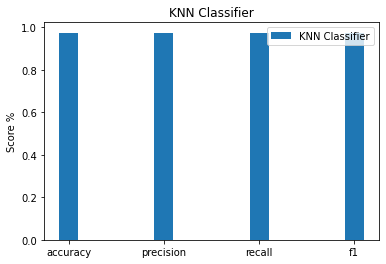

In [18]:
x = ["accuracy", "precision", "recall", "f1"]
scores = [accuracy, precision, recall, f1]

w = 0.2
    
bar1 = np.arange(len(x))
plt.bar(bar1, scores, w, label="KNN Classifier")

plt.gcf().set_size_inches(6, 4)
plt.ylabel("Score %")
plt.title("KNN Classifier")
plt.xticks(bar1, x)
plt.legend()
plt.show()

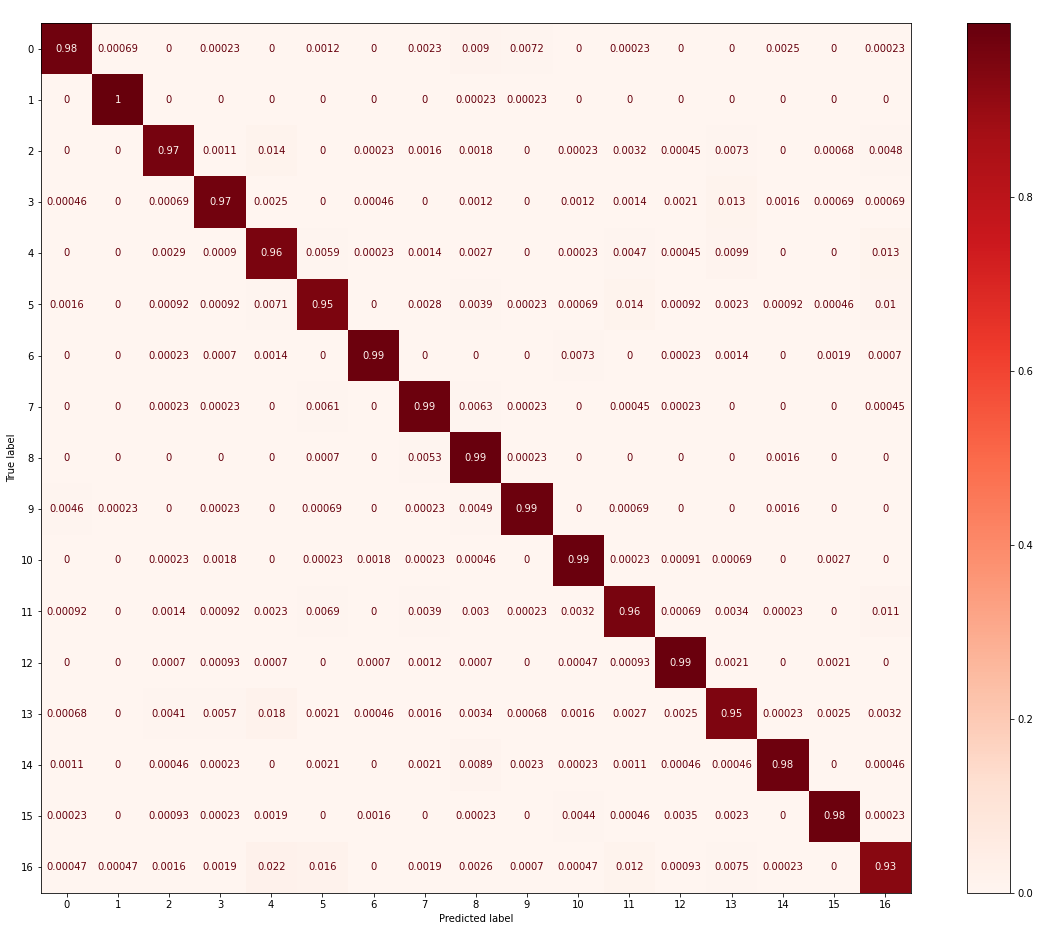

In [19]:
matrix = plot_confusion_matrix(rf, x_test, y_test, normalize='true', cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color="white")
plt.gcf().set_size_inches(20, 16)
plt.show()

<AxesSubplot:>

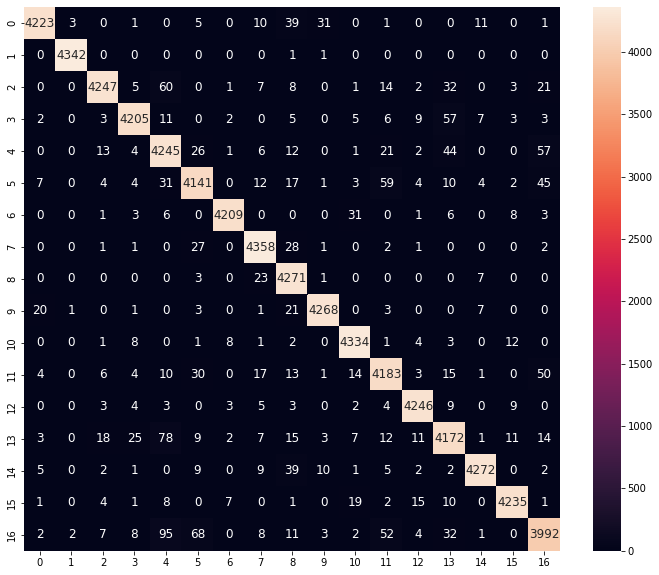

In [20]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, ax=ax, fmt='d', annot_kws={"size": 12})